# **Udacity Data Analyst Nanodegree**

## **Project 6: Identify Fraud from Enron Email**

*by Homagni Bhattachajee*

### **Project Overview**

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.

In this project I will build a person of interest identifier based on financial and email data made public as a result of the Enron scandal. I use email and financial data for 146 executives at Enron to identify persons of interest in the fraud case. A person of interest (POI) is someone who was indicted for fraud, settled with the government, or testified in exchange for immunity. This report documents the machine learning techniques used in building a POI identifier.

There are four major steps in my project:

1. Enron dataset
2. Feature processing
3. Algorithm
4. Validation

### **Exploring the dataset**

In [1]:
#Importing necessary modules

import os
import pickle
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)# setting seed number

from feature_format import featureFormat, targetFeatureSplit
from pprint import pprint
from tester import dump_classifier_and_data

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline


from sklearn.cross_validation import train_test_split
from feature_format import featureFormat, targetFeatureSplit
from sklearn.model_selection import StratifiedShuffleSplit
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


C:\Users\Homagni Bhattacharje\Miniconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Homagni Bhattacharje\Miniconda3\envs\py2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Loading data
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

In [3]:
# number of people
print "There are ", len(data_dict), "excecutives in Enron Dataset"

There are  146 excecutives in Enron Dataset


In [4]:
# name of all the excecutives
print data_dict.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

There are one name that was not a person name 'THE TRAVEL AGENCY IN THE PARK'. This was an outlier.

In [5]:
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [6]:
# number of features
print "There are ", len(data_dict['SKILLING JEFFREY K'].keys()), "features in the Enron Dataset"

There are  21 features in the Enron Dataset


In [7]:
# list of features
print "List of features: " + "\n" + str(data_dict['SKILLING JEFFREY K'].keys())

List of features: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [8]:
# count people of interest
count_poi = 0
poi_name = []
for entry in data_dict:
    if data_dict[entry]['poi'] == 1:
        count_poi += 1
        poi_name.append(entry)
print "There are " + str(count_poi) + " person of interest."
print poi_name

There are 18 person of interest.
['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']


Let's explore something more about those POIs.

In [9]:
#How many data have “NaN” for their "long-term-incentives"
count_total_incentives_NaN = 0
for entry in data_dict:
    if data_dict[entry]['long_term_incentive'] == 'NaN':
        count_total_incentives_NaN += 1
print 'NaN data for long_term_incentives:', count_total_incentives_NaN

NaN data for long_term_incentives: 79


In [10]:
#How many folks in this dataset have a 'NaN' salary? 
count_salary = 0
for entry in data_dict:
    if data_dict[entry]['salary'] == 'NaN':
        count_salary +=1
print 'NaN for salary:', count_salary

NaN for salary: 50


In [11]:
# Any data that all 'NaN' in main features:
for entry in data_dict:
    if data_dict[entry]['director_fees'] == 'NaN' and data_dict[entry]['total_stock_value'] == 'NaN' and data_dict[entry]['total_payments'] == 'NaN':
        print entry

LOCKHART EUGENE E


In [12]:
data_dict['LOCKHART EUGENE E']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

So this person LOCKHART EUGENE E had all the features in NaN and was not a POI. This person was an outlier.

Let's explore some bivariative relationship between some quantitative features from the Enron dataset.

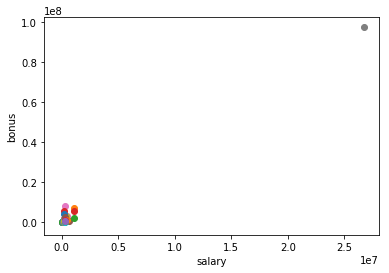

In [13]:
# SALARY VS BONUS

sys.path.append("../tools/")
### read in data dictionary, convert to numpy array
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

### plot
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

We can see that there was an outlier that was extremely higher than the rest of the data. Let's come back to the dataset and see what was the data point.

In [14]:
# remove NaN's and find max salary 
salary_list = []
for entry in data_dict:
    if type (data_dict[entry]['salary']) == int :
        salary_list.append(data_dict[entry]['salary'])
print "Total people with salary: " + str(len(salary_list))
print "Maxium salary was " + str(max(salary_list))

Total people with salary: 95
Maxium salary was 26704229


In [15]:
# find person with max salary
for entry in data_dict:
    if data_dict[entry]['salary'] == 26704229: # Maximum Salary = 26704229
        print "Name of person with maximum salary " + entry

Name of person with maximum salary TOTAL


So, the outlier was the TOTAL salary and bonus. I removed it from the dataset

In [16]:
# remove outlier from the data
data_dict.pop('TOTAL',0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [17]:
# average salary
print "Average salary: " + str(int(np.mean(salary_list)))

Average salary: 562194


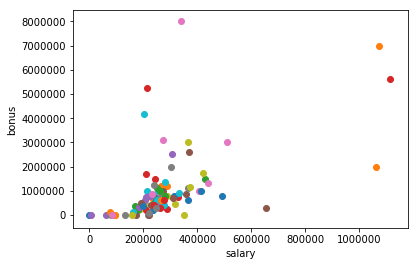

In [18]:
# Replot SALARY VS BONUS after removing outlier

data_dict.pop('TOTAL', 0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

### plot
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they got richly rewarded. What are the names associated with those point? Are they POIs?

In [19]:
# catch outliers with high salary
outliers_salary = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers_salary.append((key,int(val)))

top_4 = sorted(outliers_salary,key=lambda x:x[1],reverse=True)[:4]

pprint(top_4)

[('SKILLING JEFFREY K', 1111258),
 ('LAY KENNETH L', 1072321),
 ('FREVERT MARK A', 1060932),
 ('PICKERING MARK R', 655037)]


In [20]:
# are they POIs?
for people in top_4:
    if data_dict[people[0]]['poi'] == 1:
        print people[0]

SKILLING JEFFREY K
LAY KENNETH L


So, the two of top 4 outlier salary were POIs.

### 4. Features processing
The data has been cleaned. Next step I added a new feature. From the intuition about the data, I guessed that the more message exchanged among POIs (fraction of from_this_person_to_poi and from_poi_to_this_person to total_message) the more chance of the person is POI.

In [21]:
def get_total_list(key1, key2):
    'combine 2 lists in one, assign NaN to 0'
    new_list = []
    for i in data_dict:
        # assign NaN to 0
        if data_dict[i][key1] == 'NaN' or data_dict[i][key2] == 'NaN':
            new_list.append(0.)
        elif data_dict[i][key1]>=0:
            new_list.append(float(data_dict[i][key1]) + float(data_dict[i][key2]))
    return new_list

In [22]:
# get the total poi related emails:
total_poi_emails = get_total_list('from_this_person_to_poi', 'from_poi_to_this_person')

In [23]:
# get the total emails
total_emails = get_total_list('to_messages', 'from_messages')

In [24]:
def fraction_list(list1, list2):
    'divide one list by other'
    fraction = []
    for i in range(0,len(list1)):
        if list2[i] == 0.0:
            fraction.append(0.0)
                #print list2[j]
                #fraction.append(0.0)
        else:
            fraction.append(float(list1[i])/float(list2[i]))
            #print fraction
    return fraction

In [25]:
# get the fraction of poi emails
fraction_poi_emails = fraction_list(total_poi_emails, total_emails)

In [26]:
# add this new feature to my data
count = 0
for i in data_dict:
    data_dict[i]['fraction_poi_emails'] = fraction_poi_emails[count]
    count += 1

# test
print 'SKILLING fraction_poi_emails: ', data_dict['SKILLING JEFFREY K']['fraction_poi_emails']

SKILLING fraction_poi_emails:  0.031593038822


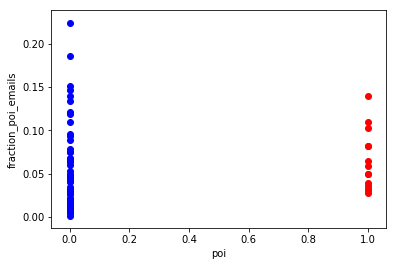

In [27]:
# let's test if this feature has any correlation with POIs
new_features_list = ['poi', 'fraction_poi_emails']
data = featureFormat(data_dict, new_features_list)

### plot
for point in data:
    poi = point[0]
    fraction_poi_emails = point[1]
    #matplotlib.pyplot.boxplot( data )
    if point[0] == 1:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'r')
    else:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'b')
    #matplotlib.pyplot.boxplot(data)
matplotlib.pyplot.xlabel("poi")
matplotlib.pyplot.ylabel("fraction_poi_emails")
matplotlib.pyplot.show()

I can see the different of fraction of poi and non-poi emails. Let's use this new feature to see if it improves the classifier.

#### Original features

In [28]:
# features_list_original
features_list = ['poi',
                 'salary',
                 'from_poi_to_this_person',
                 'from_this_person_to_poi',
                 'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'restricted_stock_deferred',
                 'total_stock_value',
                 'expenses',
                 'loan_advances',
                 'from_messages',
                 'other',
                 'director_fees',
                 'deferred_income',
                 'long_term_incentive']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

#accuracy parameters
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(19):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.793103448276
Precision:  0.142857142857
Recall:  0.142857142857
Decision Tree algorithm run time:  0.017 s
Feature Ranking: 
1 feature salary (0.453596502238)
2 feature from_poi_to_this_person (0.210759412118)
3 feature from_this_person_to_poi (0.0870188370188)
4 feature to_messages (0.078316953317)
5 feature deferral_payments (0.078316953317)
6 feature total_payments (0.0696150696151)
7 feature exercised_stock_options (0.0223762723763)
8 feature bonus (0.0)
9 feature restricted_stock (0.0)
10 feature shared_receipt_with_poi (0.0)
11 feature restricted_stock_deferred (0.0)
12 feature total_stock_value (0.0)
13 feature expenses (0.0)
14 feature loan_advances (0.0)
15 feature from_messages (0.0)
16 feature other (0.0)
17 feature director_fees (0.0)
18 feature deferred_income (0.0)
19 feature long_term_incentive (0.0)


#### Add new features

In [29]:
# features_list with new feature created (fraction_poi_emails)
features_list = ['poi',
                 'salary',
                 'from_poi_to_this_person',
                 'fraction_poi_emails',
                 'from_this_person_to_poi',
                 'to_messages',
                 'deferral_payments',
                 'total_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock',
                 'shared_receipt_with_poi',
                 'restricted_stock_deferred',
                 'total_stock_value',
                 'expenses',
                 'loan_advances',
                 'from_messages',
                 'other',
                 'director_fees',
                 'deferred_income',
                 'long_term_incentive']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'


# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(20):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.758620689655
Precision:  0.181818181818
Recall:  0.285714285714
Decision Tree algorithm run time:  0.02 s
Feature Ranking: 
1 feature salary (0.453596502238)
2 feature from_poi_to_this_person (0.210759412118)
3 feature fraction_poi_emails (0.156633906634)
4 feature from_this_person_to_poi (0.078316953317)
5 feature to_messages (0.0696150696151)
6 feature deferral_payments (0.0310781560782)
7 feature total_payments (0.0)
8 feature exercised_stock_options (0.0)
9 feature bonus (0.0)
10 feature restricted_stock (0.0)
11 feature shared_receipt_with_poi (0.0)
12 feature restricted_stock_deferred (0.0)
13 feature total_stock_value (0.0)
14 feature expenses (0.0)
15 feature loan_advances (0.0)
16 feature from_messages (0.0)
17 feature other (0.0)
18 feature director_fees (0.0)
19 feature deferred_income (0.0)
20 feature long_term_incentive (0.0)


The new feature improved recall and precision. So, I decided to use the new feature henceforth.

#### Intelligently Select Features

The next step is selecting the features that convey the most information to our model. Leaving some features out has some advantages, like reducing the noise in the classification, and saving processing time, since there are less features to compute. Now have the following features to choose from :

['poi','salary','from_poi_to_this_person','fraction_poi_emails','from_this_person_to_poi','to_messages','deferral_payments',
  'total_payments','exercised_stock_options','bonus','restricted_stock','shared_receipt_with_poi',   'restricted_stock_deferred','total_stock_value','expenses','loan_advances', 'from_messages','other','director_fees',
  'deferred_income', 'long_term_incentive']
  
Now, according to the p-values obtained, the features 'salary' to 'deferral_payments' have some positive p-value. Hence, these features have significance and re included for final analysis.

Apart from these features, we have the following stock-related features:
    'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred' & 'total_stock_value'.
Only the first two features have discretionary provisions which may have been traded as favour by the poi and hence they were manually selected for further analysis.

Also 'bonus' is a feature that may be given to those employees who have higher productivity-which may or may not be acheived by dubious means, which means that we have to keep this feature for more analysis.

The rest of the features are generic and do not have much discretionary value attached to it and hence we will not consider them any further.

So the final feature_list obtained is as follows:
                 
features_list = ['poi',
                 'salary',
                 'from_poi_to_this_person',
                 'fraction_poi_emails',
                 'from_this_person_to_poi',
                 'to_messages',
                 'deferral_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock']

In [30]:
# features_list with new feature created (fraction_poi_emails)
features_list = ['poi',
                 'salary',
                 'from_poi_to_this_person',
                 'fraction_poi_emails',
                 'from_this_person_to_poi',
                 'to_messages',
                 'deferral_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.777777777778
Precision:  0.333333333333
Recall:  0.714285714286
Decision Tree algorithm run time:  0.016 s


As we can see, we now have precision and recall values greater than 0.3 which implies that the features chosen are appropriate an may be deemed to be final feature list.

Since Decision Tree algorithm was used which does not need scaling, feature scaling was not used.


### Algorithm Selection and Tuning
I have tried Decision tree. With the small samples like that Naive Bayes may not work very well. So, let's try Random Forest, Adaboost and NearestK.

#### Random Forest

In [31]:
features_list = ['poi',
                 'salary',
                 'from_poi_to_this_person',
                 'fraction_poi_emails',
                 'from_this_person_to_poi',
                 'to_messages',
                 'deferral_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock']


data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size = 0.4, random_state = 42)

t0 = time()
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Random algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.851851851852
Precision:  0.0
Recall:  0.0
F1 score: 0.0
Random algorithm run time:  0.137 s


#### Adaboost

In [32]:
features_list = ['poi',
                 'salary',
                 'from_poi_to_this_person',
                 'fraction_poi_emails',
                 'from_this_person_to_poi',
                 'to_messages',
                 'deferral_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock']


data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size = 0.4, random_state = 42)

t0 = time()
clf = AdaBoostClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Adaboost algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.796296296296
Precision:  0.25
Recall:  0.285714285714
F1 score: 0.266666666667
Adaboost algorithm run time:  0.472 s


#### Logistic Regression

In [33]:
features_list = ['poi',
                 'salary',
                 'from_poi_to_this_person',
                 'fraction_poi_emails',
                 'from_this_person_to_poi',
                 'to_messages',
                 'deferral_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock']


data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size = 0.4, random_state = 42)

t0 = time()
clf = LogisticRegression()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Logistic regression algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.740740740741
Precision:  0.181818181818
Recall:  0.285714285714
F1 score: 0.222222222222
Logistic regression algorithm run time:  0.02 s


#### Nearest K

In [34]:
features_list = ['poi',
                 'salary',
                 'from_poi_to_this_person',
                 'fraction_poi_emails',
                 'from_this_person_to_poi',
                 'to_messages',
                 'deferral_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size = 0.4, random_state = 42)

t0 = time()
clf = NearestCentroid()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Nearest K algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.87037037037
Precision:  0.5
Recall:  0.428571428571
F1 score: 0.461538461538
Nearest K algorithm run time:  0.021 s


#### SVC

In [35]:
features_list = ['poi',
                 'salary',
                 'from_poi_to_this_person',
                 'fraction_poi_emails',
                 'from_this_person_to_poi',
                 'to_messages',
                 'deferral_payments',
                 'exercised_stock_options',
                 'bonus',
                 'restricted_stock']


data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data into training and testing
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size = 0.4, random_state = 42)

t0 = time()
clf = svm.LinearSVC()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'SVC algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.648148148148
Precision:  0.2
Recall:  0.571428571429
F1 score: 0.296296296296
SVC algorithm run time:  0.026 s


After trying other algorithms, I decided to go with Decision Tree as it has the highest performance regarding overall accuracy, precision, recall and F1 score.

### Tuning by GridSearchCV

The ultimate goal of machine learning is to make a machine system that can automatically build models from data without requiring tedious and time consuming human involvement. 

One of the difficulties is that learning algorithms (eg. decision trees, random forests, clustering techniques, etc.) require you to set parameters before you use the models (or at least to set constraints on those parameters).

How we set those parameters can depend on a whole host of factors. That said, the goal, is usually to set those parameters to optimal values that enable us to complete a learning task in the best way possible. 

Thus, tuning an algorithm or machine learning technique, can be simply thought of as process which one goes through in which they optimize the parameters that impact the model in order to enable the algorithm to perform the best (once, of course you have defined what "best" actual is).

#### Decision Tree

In [39]:
# Using pipeline
pipe = Pipeline(steps=[('classifDT', DecisionTreeClassifier())])

#param grid
params = [{
    'classifDT__max_features':["sqrt","log2"],
    'classifDT__max_depth':np.arange(0,10)
}]
#Stratified_Shuffle_Split for validation

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, train_size= None, random_state= None)

# run grid search
clf = GridSearchCV(estimator=pipe, 
                     param_grid=params, 
                     scoring='roc_auc',
                     n_jobs = -1, 
                     cv= 10,
                     verbose = 1,
                     error_score = 0)

clf.fit(features_train, labels_train)

# examine the best model
print '*******Final results*********'
print clf.best_score_
print clf.best_params_
print clf.best_estimator_

#Predicted values of new best fit classifier
pred = clf.predict(features_test)


print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.9s


*******Final results*********
0.674352019289
{'classifDT__max_features': 'log2', 'classifDT__max_depth': 8}
Pipeline(memory=None,
     steps=[('classifDT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])
Accuracy: 0.648148148148
Precision:  0.272727272727
Recall:  0.428571428571
Decision Tree algorithm run time:  202.854 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.1s finished


The parameters ,'max_depth' and 'max_features' of DecisionTreeClassifier were tuned using GridsearchCV.
max_depth refers to the maximum depth of the tree. 
max_features refers to the number of features to consider when looking for the best split.

The parameters were tuned by running a grid with the best possible combinations for the parameters chosen and allowing the classifier to find the best fit and thus the best combination of the parametrs.

### Analysis Validation and Performance

The Classifier performance, here Decision Tree classifier waqs validated by fitting the best estimator parameter set with test data which is really a subset of the training data held back from the machine learning algorithms until the very end. After we have selected and tuned the machine learning algorithms on your training dataset we can evaluate the learned models on the validation dataset to get a final objective idea of how the models might perform on unseen data, which makes validation extremely important.

This validation was proceeded with the following steps uing the cross validation vodule of sklearn.
First I used accuracy to evaluate my algorithm. It was a mistake because in this case we have a class imbalance problem - the number of POIs is small compared to the total number of examples in the dataset. 
So I had to use precision and recall for these activities instead. I was able to reach average value of precision and recall was 0.27 and 0.42 respectively.

Now, precision is the fraction of relevant instances among the retrieved instances, while recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances. 

In simple terms, high precision means that an algorithm returned substantially more relevant results than irrelevant ones, while high recall means that an algorithm returned most of the relevant results.

Wrt to this project, 0.27 precision means that the POI identified was correct 27% times while 0.42 recall value means the 42% of the POI returned are relevant.

#### Saving Data

So finally,I would save the classifier, dataset and feature list as three pickle files (my_dataset.pkl, my_classifier.pkl, my_feature_list.pkl) respectively.

In [40]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

dump_classifier_and_data(clf.best_estimator_, my_dataset, features_list)

#### Resources

1. [Sklearn documentation](http://scikit-learn.org/stable/documentation.html)
2. [StackOverflow](https://stackoverflow.com/)
3. [Github](https://github.com/)
